Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split the data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# To scale the data using z-score 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


#import clustering algorithm for outlier detection
from sklearn.cluster import DBSCAN

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
data = pd.read_csv('boston.csv')

#copying the data to anote
data_copy = data.copy()

## Data Overview

In [3]:
#check the format of the data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:

data.iloc[:, 2]

0       2.31
1       7.07
2       7.07
3       2.18
4       2.18
       ...  
501    11.93
502    11.93
503    11.93
504    11.93
505    11.93
Name: INDUS, Length: 506, dtype: float64

In [5]:
#check the shape of the dataset
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 506 rows and 13 columns.


### **Check the data types of the columns for the dataset**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**
* All columns are numeric, with 10 being data type float64 and 3 being data type int64. 
* There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.

### **Checking that there are no duplicate values**

In [7]:
data.duplicated().sum()

0

**Observations:**

There are no duplicate values in the data. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Summary Statistics for All Variables

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**

* Per capita crime rate by town has a very wide distribution, and is likely skewed by outlier towns with very high crime, since the median is 0.256 and the mean is 3.613. 
* The ZN variable, which represents proportion of residential land zoned for lots over 25,000 feet, is also skewed by a few towns that are pulling the mean proportion of residential land zoned for lots over 25,000 up,since the median is 0 and the mean is 11.36.
*  The CHAS variable indicates that most of the houses are not along the Charles river, since even the 3rd quartile value is 0.00, and the mean is very low.
* A majority of the houses in the dataset are built before 1940. 
* The mean value of houses in Boston in 1970 is $22,532.


## Univariate Analysis

### Checking Crime Rate 

In [9]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

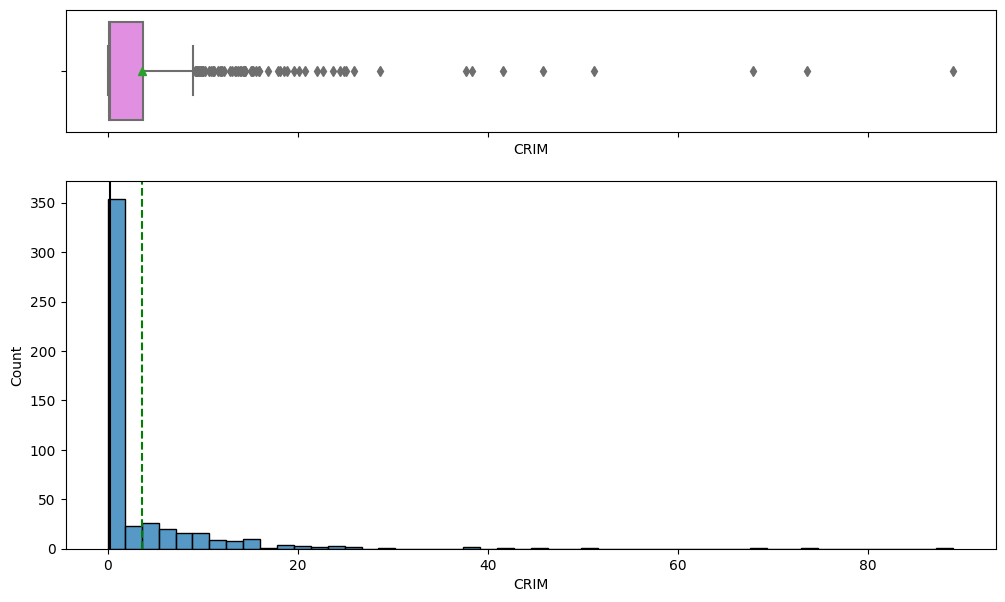

In [10]:
#Check the distribution of variable CRIM
histogram_boxplot(data, "CRIM", kde = False, bins = 50)

### Crime Observations: 

* The majority of towns have very low per capita crime rates <5%, but a small number of towns/neighborhoods have very high crime rates and are positively skewing the mean. 

### Other Questions:

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

### 1. What does the distribution of 'MEDV' look like? 

In [11]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

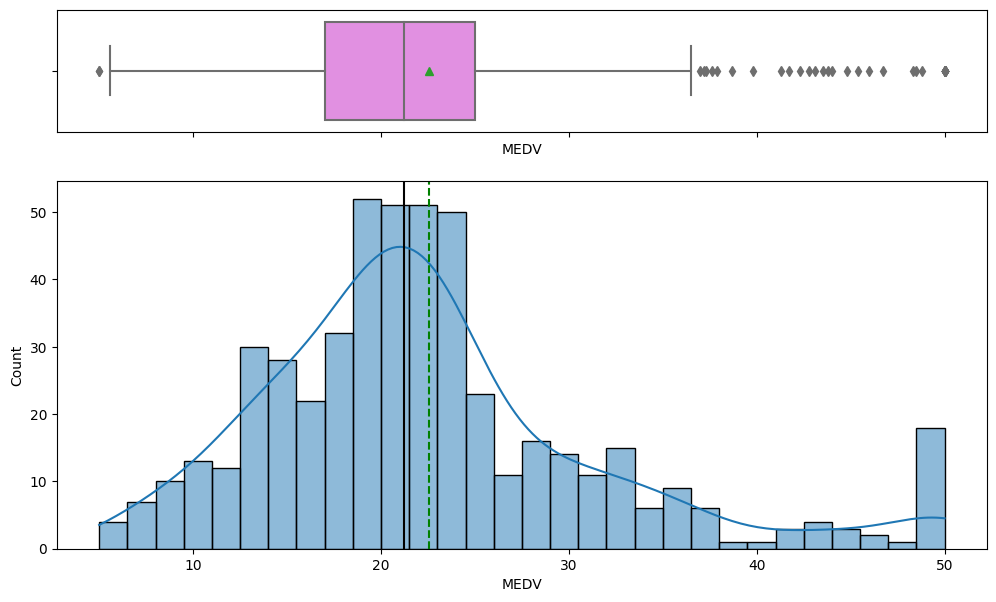

In [12]:
#Create histogram and boxplot of MEDV variable
histogram_boxplot(data, "MEDV", kde = True, bins = 30)

### MEDV Observations:

* The mean housing price in Boston in 1970 was 22,532 dollars. The distribution of the prices is mostly normally distributed, with a slight positive/right skewness. 
* There are roughly 20 houses that have prices of 50,000 dollars, which suggests that there may be an artificial cap to housing prices above that value. 

### 3. Univariate Analysis of all Variables 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


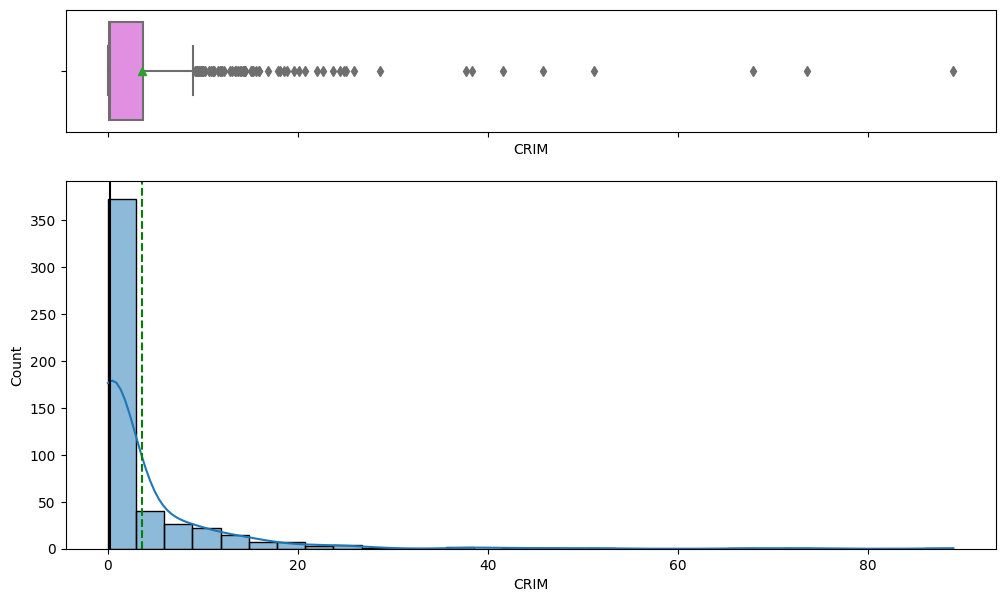

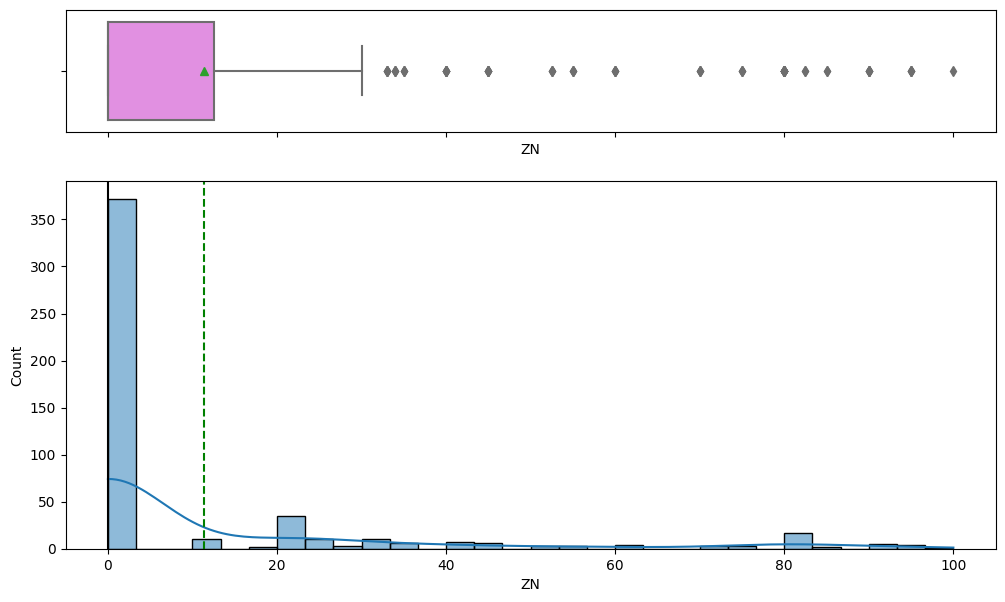

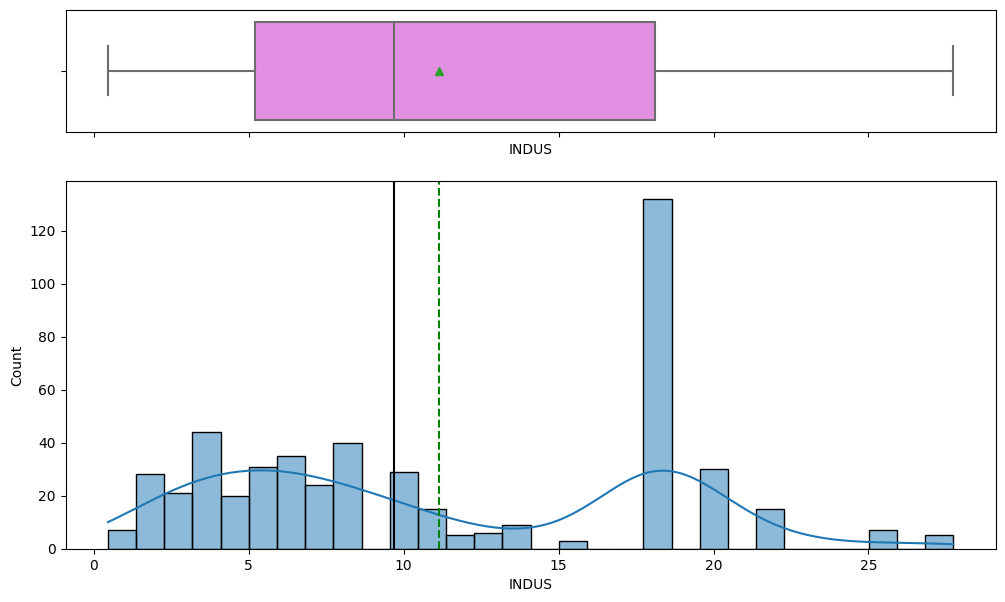

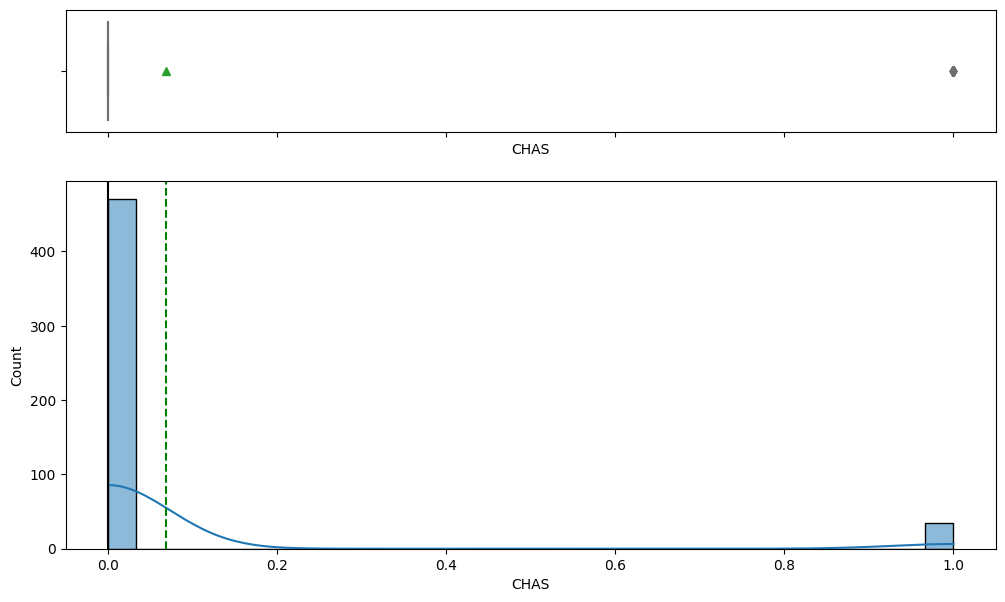

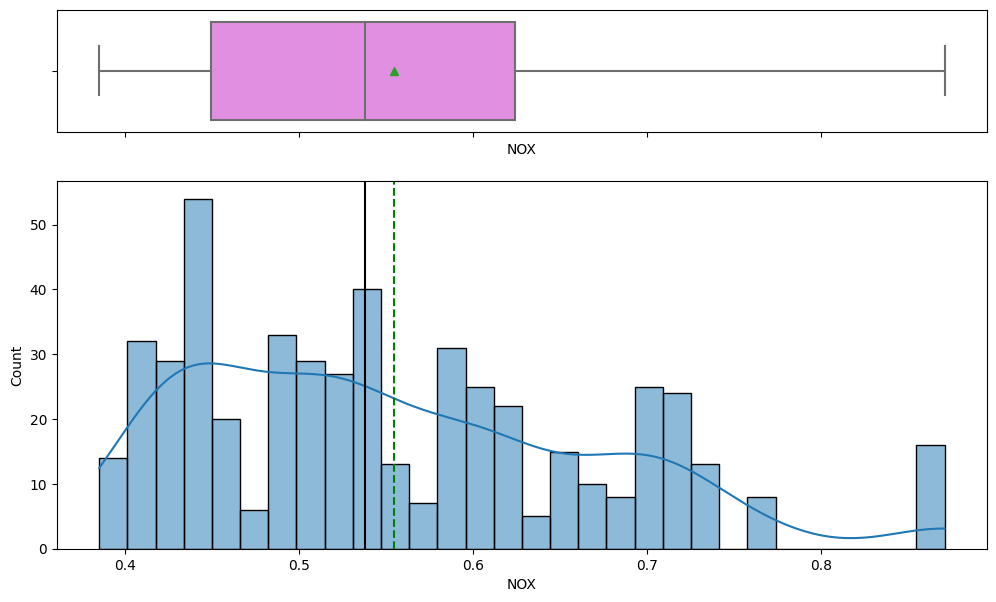

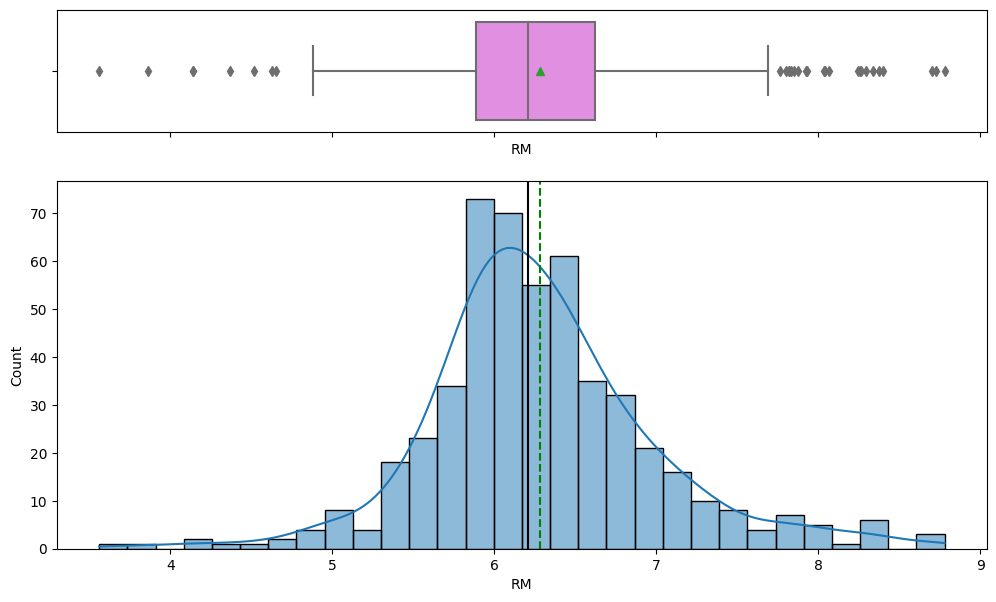

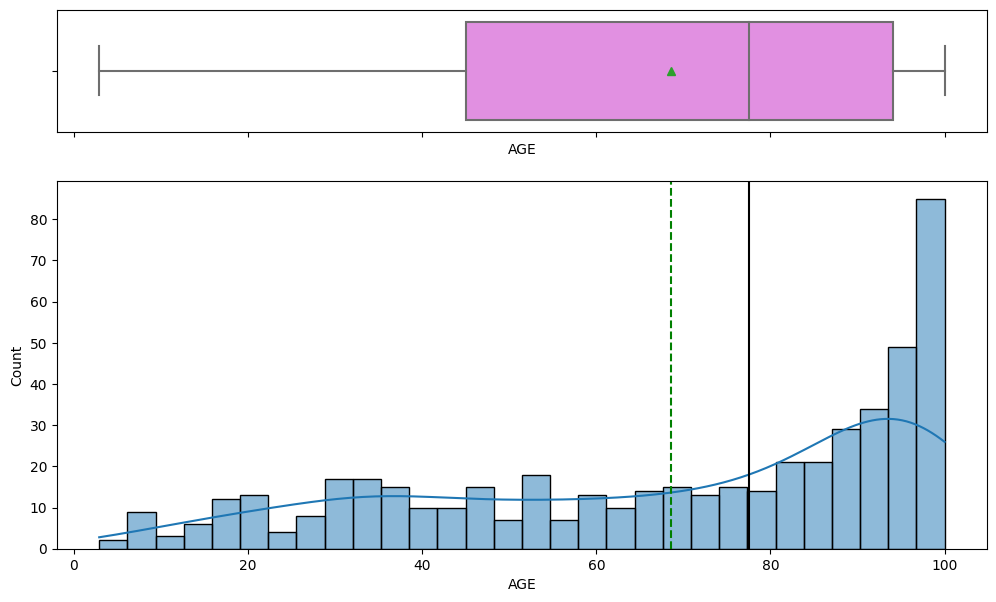

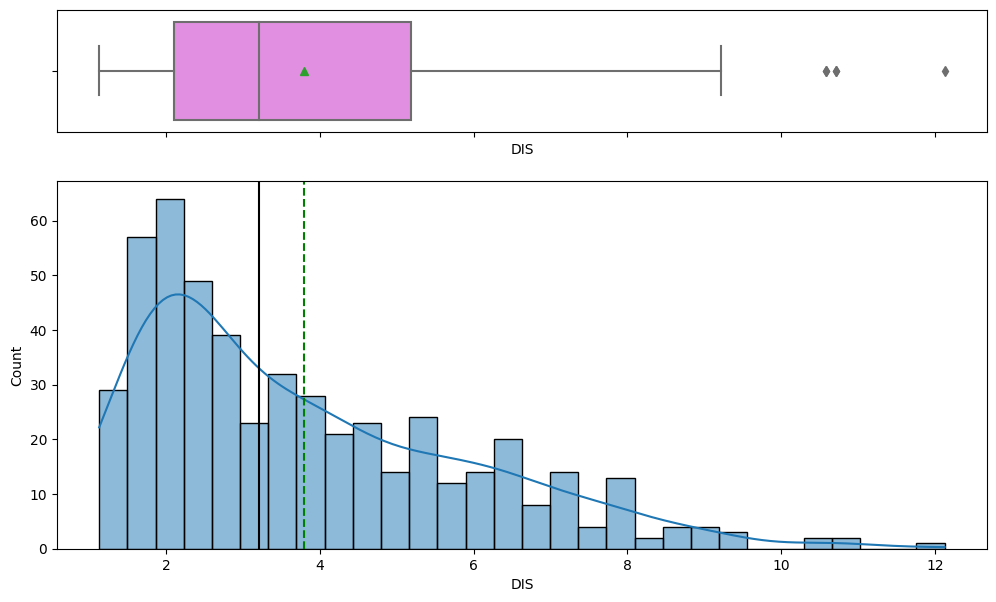

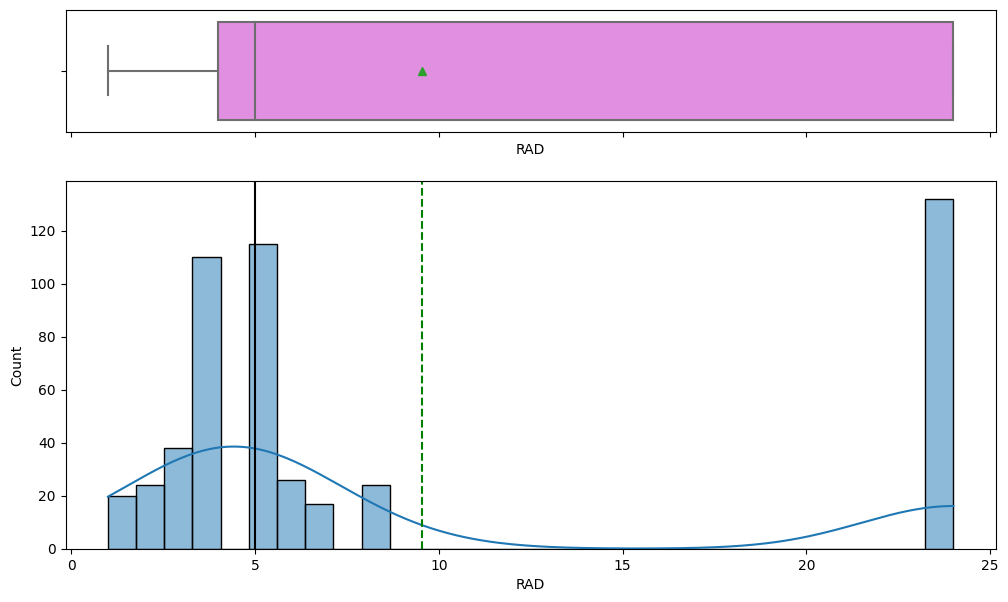

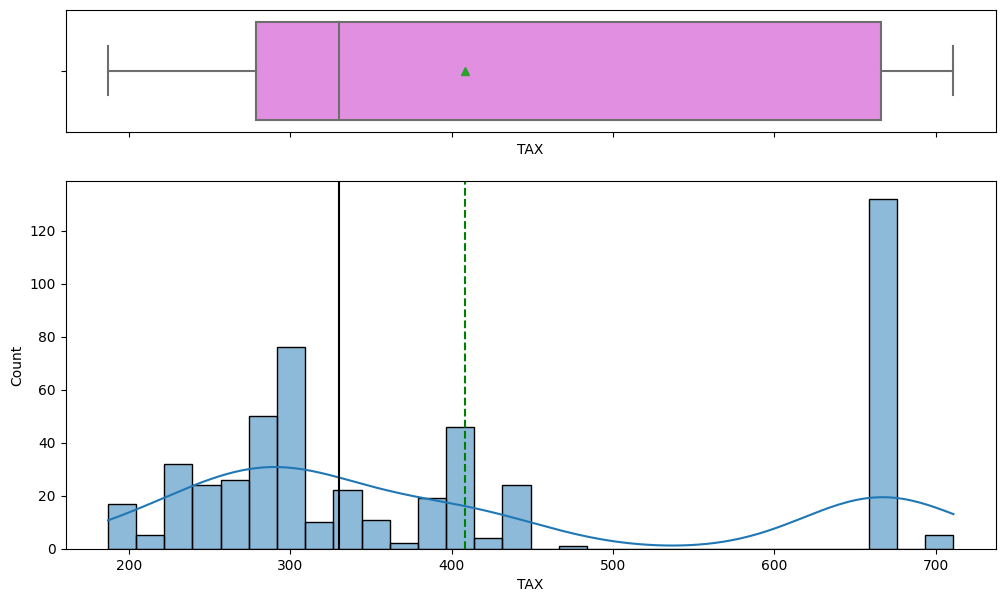

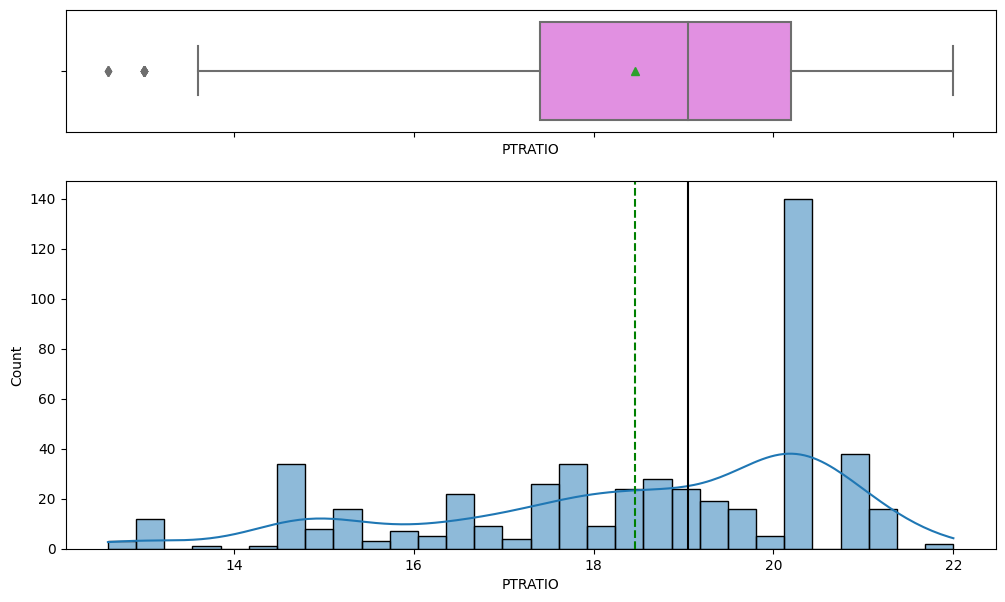

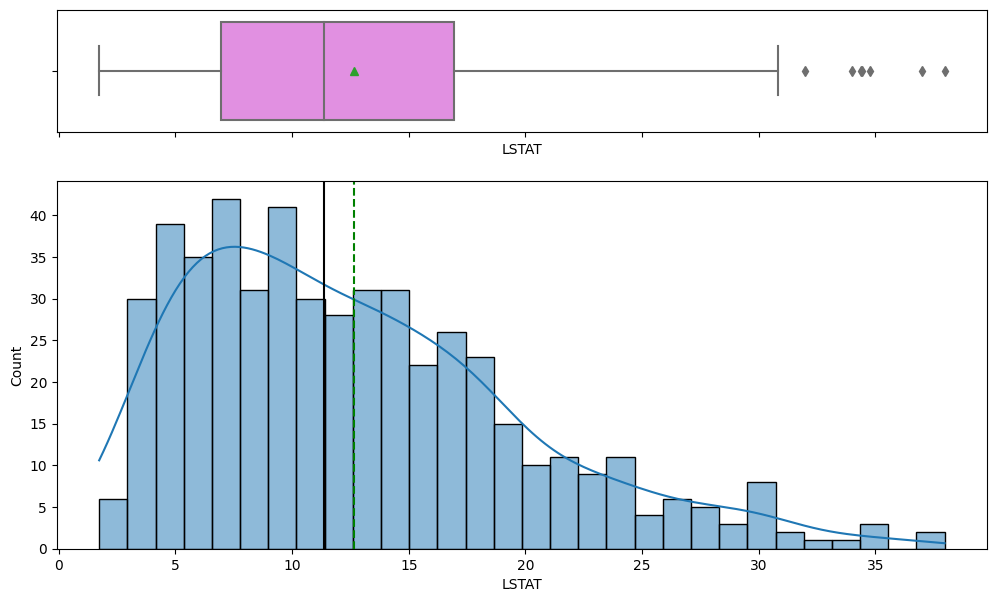

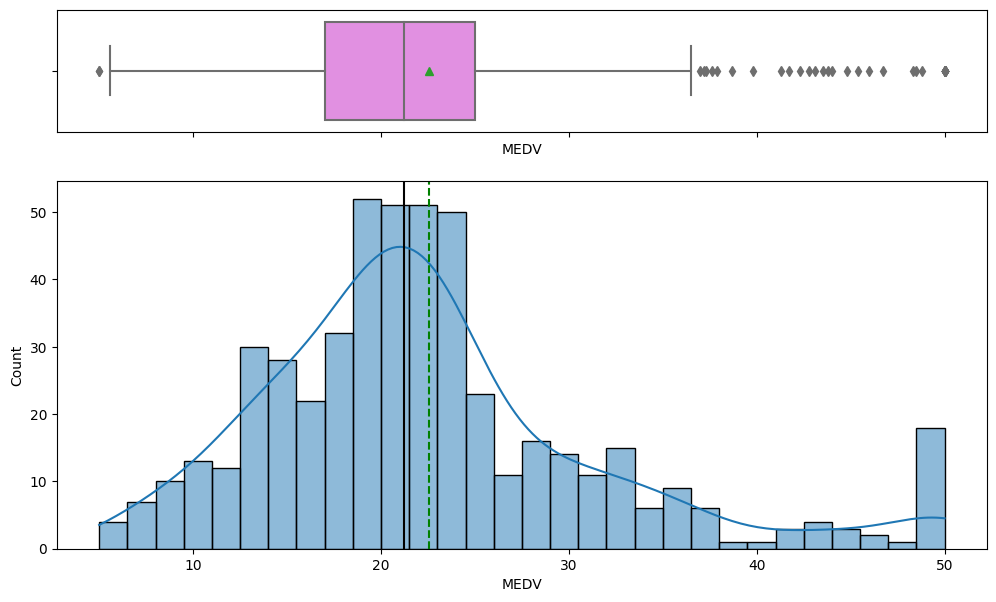

In [13]:
#create a list of all the column names
column_names = data.columns
print(column_names)

#create a histogram of each column in the boxplot to quickly screen for interesting variables:
for i in column_names:
    histogram_boxplot(data, i, kde = True, bins = 30)

### 3. What are all the inferences that can be found by doing univariate analysis for different variables?

**Observations**

* The vast majority of homes in the survey are not along the Charles river. 
* There is likely a larger town in the dataset compared with the other towns that is skewing some of the variables such as INDUS, RAD, TAX, and PTRATIO. These variables are all attributes that would remain consistent across a town. In these variables, we see a large count around 130-140, suggesting it is likely the same houses within a town.
* The RAD variable shows that there is one town with very high accessibility to radial highways. 
* A majority of the homes in Boston in 1970 were over 60 years old.
* The CHAS variable is treated as a continuous variable, but it can be considered a categorical variable, since there are only two options (On Charles River/Not on Charles River).

## Bivariate Analysis

### 2. What can we infer from the correlation heatmap? 

<Axes: >

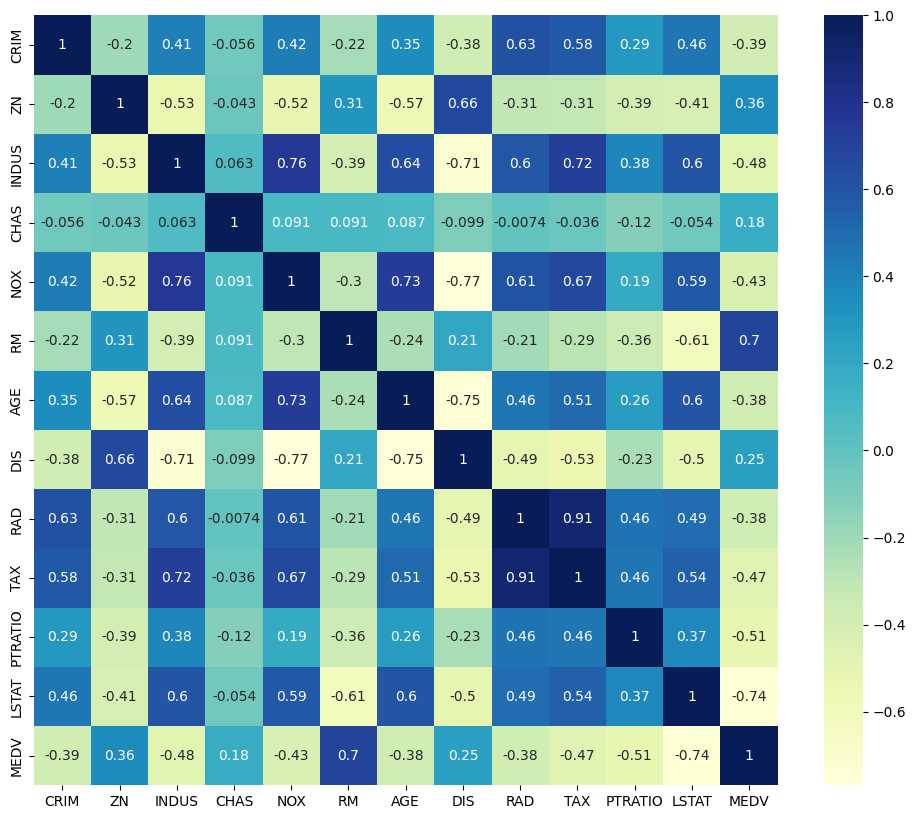

In [14]:
#create a heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap="YlGnBu")

### Correlation Heatmap Observations:

* There are some correlations between the independent variables and the dependent variables. 
* There is a strong correlation between the tax rate and the accessibility to radial highways, suggesting that better access to highways comes with a higher tax rate.
* The level of Nitric Oxide concentration has a positive correlation with the variables related to industrial buildings (INDUS) and distance to highways (RAD), as well as lower socioeconomic status (LSTAT). 
* Crime rates are positively correlated with proximity to highways (RAD) and Industrial Buildings (INDUS), and higher % of lower status of the population (LSTAT). 
* The median value of homes in Boston in 1970 is most strongly positively correlated with the number of rooms of the house. There is a strong negative correlation between the percentage of people with lower socieconomic status and the price of homes. Other factors negatively affecting home prices are the tax rate, the age, pollution, and percentage of non-retail business acres per town. 


## Examining Variables with High Correlations >0.7 or <-0.7

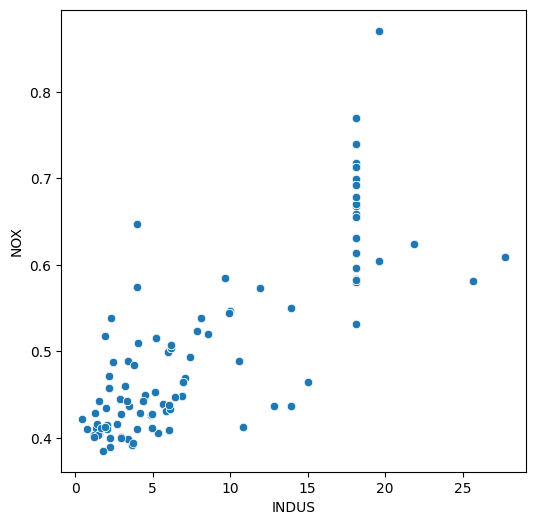

In [15]:
#examing strong correlation between INDUS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'NOX', data = data)

plt.show()

**Observations**:

* There appears to be a positive correlation between INDUS and NOX, which makes sense given that more industrial areas may give off more emissions than residential areas. 

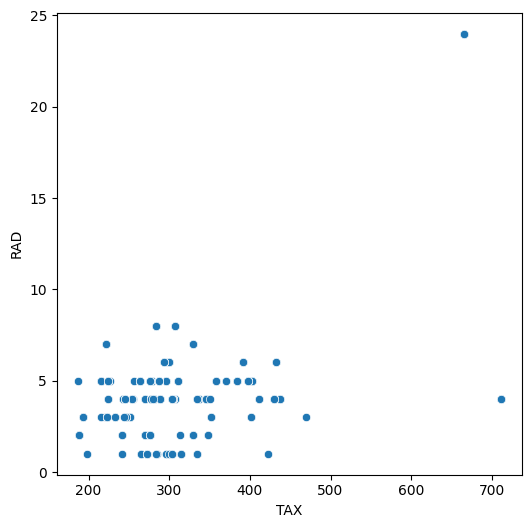

In [16]:
#examing strong correlation between TAX and RAD
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'TAX', y = 'RAD', data = data)

plt.show()

**Observations:**
* There does not appear to be a strong relationship between RAD and TAX. The correlation is likely due to the outlier.

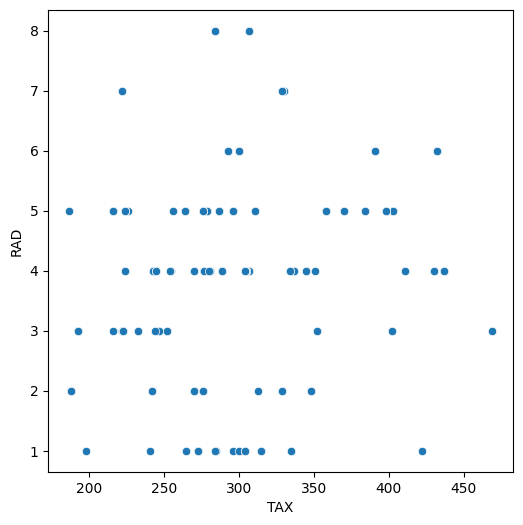

The correlation between TAX and RAD is 0.24975731331429196


In [17]:
data_low_tax = data[data['TAX'] < 600]

plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'TAX', y = 'RAD', data = data_low_tax)

plt.show()


# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(data_low_tax['TAX'], data_low_tax['RAD'])[0])


**Observations:**
* The correlation appears to be solely due to the outliers, which must have had a large count to create such a strong correlation. 

## Data Preprocessing

- Missing value treatment - not needed, no missing values found during EDA
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Outlier Detection and Treatment

* From the univariate analysis, we saw the MEDV had many outliers at 50,000 dollars. Let's plot MEDV with other independent variables with high correlation >0.7 like RM and LSTAT to see what they look like in the context of other variables.


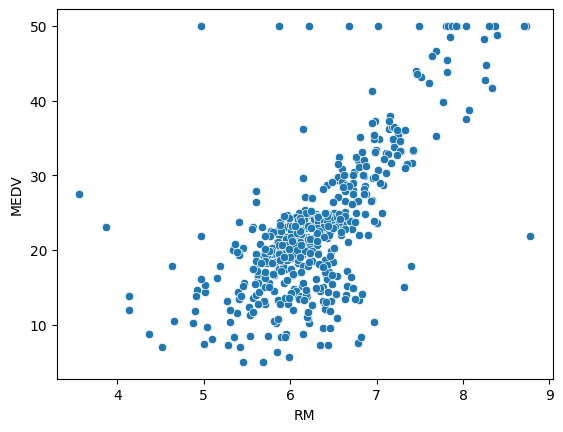

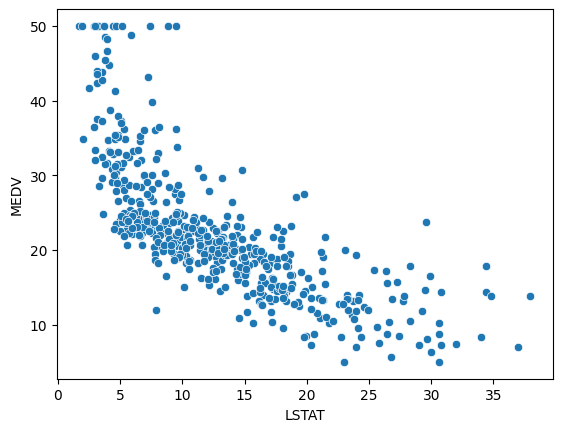

In [18]:
#check variables with high correlation to MEDV to see if linearity has improved
cols_visualize = ['RM', 'LSTAT']

for col in cols_visualize:
    sns.scatterplot(x = col, y = 'MEDV', data = data, palette = 'Dark2')
    
    plt.show()


**Observations**:
* It is clear that data points with MEDV values at 50 (50,000 dollars) are not linearly correlated with the variable RM and LSTAT. Let's remove these values and plot the data again. 

### Removing outliers at 50,000 dollars in MEDV

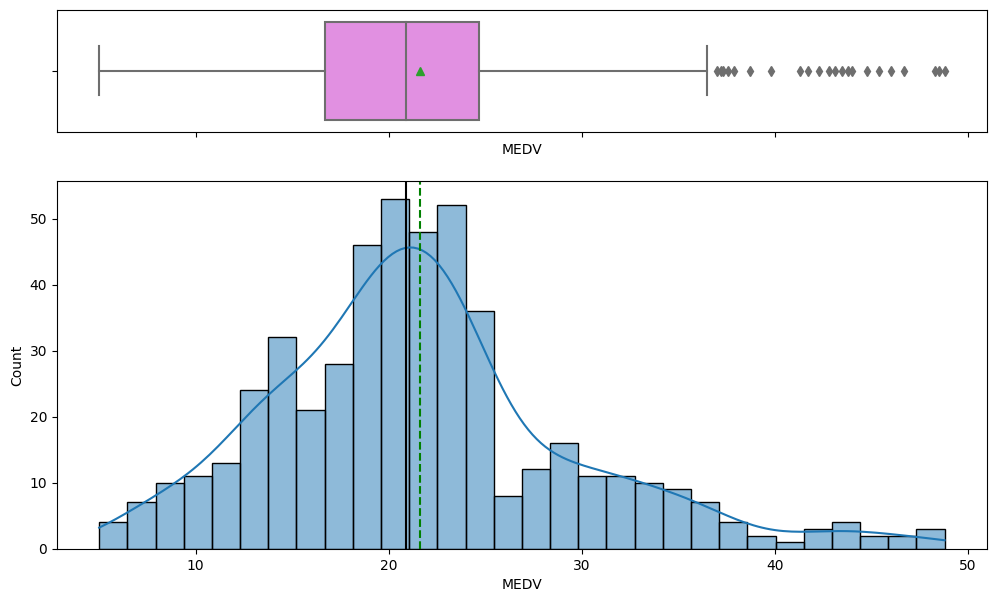

In [19]:
# remove the outliers at 50,000 dollars
data = data[data['MEDV'] < 50]

#Create histogram and boxplot of MEDV variable without the outliers
histogram_boxplot(data, "MEDV", kde = True, bins = 30)

**Observations**:
* We have successfully removed these outliers at 50,000. Now let's check the relationship with RM and LSTAT as we did before. 

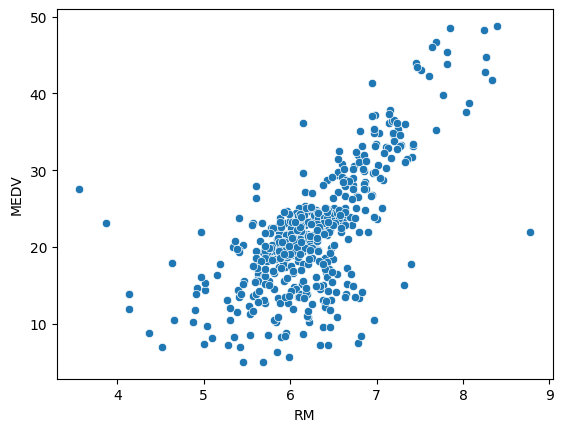

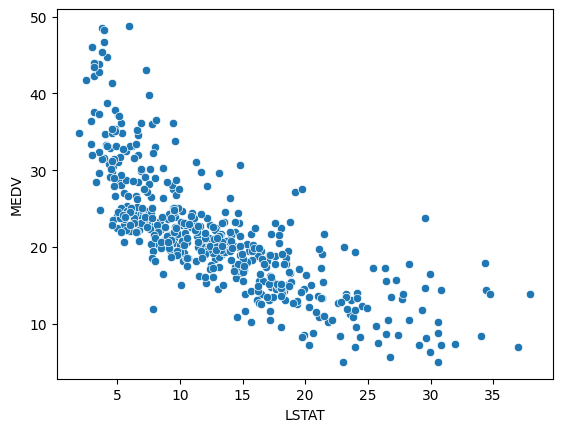

In [20]:
#check variables with high correlation to MEDV to see if linearity has improved
cols_visualize = ['RM', 'LSTAT']

for col in cols_visualize:
    sns.scatterplot(x = col, y = 'MEDV', data = data, palette = 'Dark2')
    
    plt.show()

**Observations**:
* We have successfully removed these outliers at 50,000, and now the relationships between MEDV and variables like RM and LSTAT are more linear, which should help the regression model to make better predictions. 

### Log Transform of Dependent Variables

Text(0.5, 1.0, 'Log-Transformed Data')

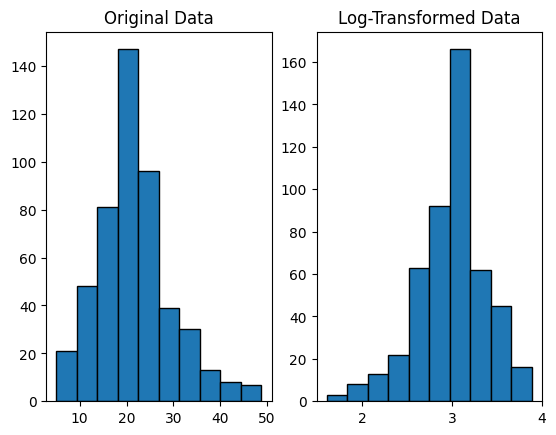

In [21]:
#Perform log transform on MEDV variable, which is right skewed.

#create log-transformed data
data_log = np.log(data['MEDV'])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data["MEDV"], edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

In [22]:
#create log-transformed data
data["MEDV"] = np.log(data['MEDV'])

**Observations:** 

* Right skew is slightly reduced by performing a log-transform on variable MEDV. 

## Model Building - Linear Regression

In [23]:
# Separating independent variables and the target variable
train_features = data.drop('MEDV',axis=1)

train_target = data['MEDV'] 

In [24]:
# Creating an instance of the MinMaxScaler
scaler = StandardScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)

train_features_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.417401,0.301813,-1.291856,-0.250812,-0.139895,0.505040,-0.109432,0.121208,-0.980635,-0.667101,-1.527280,-1.122679
1,-0.414992,-0.486924,-0.593329,-0.250812,-0.731821,0.269017,0.377488,0.537330,-0.865459,-0.988734,-0.341504,-0.534772
2,-0.414995,-0.486924,-0.593329,-0.250812,-0.731821,1.439934,-0.255152,0.537330,-0.865459,-0.988734,-0.341504,-1.256937
3,-0.414412,-0.486924,-1.310933,-0.250812,-0.826186,1.153335,-0.798939,1.056878,-0.750284,-1.107857,0.085376,-1.410980
4,-0.410202,-0.486924,-1.310933,-0.250812,-0.826186,1.381694,-0.500390,1.056878,-0.750284,-1.107857,0.085376,-1.073216


In [25]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(train_features_scaled, train_target, test_size = 0.2, shuffle = True, random_state = 1)

In [26]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (392, 12)
Shape of test set :  (98, 12)


In [27]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [28]:
import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
x_train1 = sm.add_constant(x_train)

# Add constant to test data
x_test1 = sm.add_constant(x_test)

# Train the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# Get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     121.2
Date:                Sun, 28 May 2023   Prob (F-statistic):          1.28e-121
Time:                        21:48:57   Log-Likelihood:                 119.20
No. Observations:                 392   AIC:                            -212.4
Df Residuals:                     379   BIC:                            -160.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0079      0.009    327.291      0.0

**Observations:**

- We can observe that `R-squared` for the model is `~0.79`. 
- Not all the variables are statistically significant enough to predict the outcome variable. To check which ones are statistically significant or have enough predictive power to predict the target variable, we check the `p-value` for all the independent variables. Independent variables with a p-value of higher than 0.05 are not significant for the 95% confidence level.
    * We can see from the table that ZN, INDUS, CHAS, and AGE do not have enough predictive power at the 95% confidence interval to predict the target variable. 

**Interpreting the Regression Results:**

1. **Adjusted R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.78**, which means that the model is able to explain 84% of the variance in the target variable.

2. **coef**: It represents the change in the output Y due to a change of one unit in the variable (everything else held constant).
3. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the more accurate the coefficients are.
4. **P > |t|**: The p-value:
   
   * Pr(>|t|): For each independent feature there is a null hypothesis and an alternate hypothesis 

    **Ho:** Null Hypothesis - The independent feature is not significant 
   
    **Ha:** Alternate Hypothesis - The independent feature is significant 
    
   * A p-value of less than 0.05 is considered to be statistically significant.

   
5. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).



* Both the **R-squared and Adjusted R-squared of the model are around 79%**. This is a clear indication that we have been able to create a good model that can explain variance in the LOS of patients for up to 79%.

* We can examine the significance of the regression model, and try dropping insignificant variables.

## 2. Is there multicollinearity? Check using VIF

Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between independent variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

There are different ways of detecting (or testing) multicollinearity. One such way is the Variation Inflation Factor.

Variance Inflation factor: Variance inflation factor measures the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is “inflated” by the existence of correlation among the predictor variables in the model.

General Rule of thumb: If VIF is 1, then there is no correlation between the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas, if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeds 10, it shows signs of high multicollinearity.

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index = x_train1.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      1.004409
CRIM       1.946655
ZN         2.227683
INDUS      3.838062
CHAS       1.060257
NOX        4.491114
RM         1.907624
AGE        3.017930
DIS        4.033594
RAD        7.403731
TAX        8.571042
PTRATIO    1.673511
LSTAT      3.031621
dtype: float64



**Observations**:
* A few variables have high VIF scores. 
* TAX has the highest VIF score, so let's try dropping it and see if the VIF improves. 

In [30]:
x_train1 = x_train1.drop("TAX", axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index = x_train1.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      1.003522
CRIM       1.945885
ZN         2.117359
INDUS      3.271637
CHAS       1.037920
NOX        4.457512
RM         1.900763
AGE        3.017773
DIS        4.030724
RAD        2.894931
PTRATIO    1.660826
LSTAT      3.031147
dtype: float64



**Observations**:
* All VIF scores have reduced below 5, so multicollinearity has reduced. 
* Now let's check the model again and begin removing independent variables that do not have significant correlation with MEDV based on their p-values. From the first model, we see that CHAS, INDUS, and AGE are worth dropping due to high p-values. 

In [31]:
x_train1 = x_train1.drop(["ZN", "AGE", "INDUS", 'RAD', 'CHAS'], axis = 1)

ols_model_2 = sm.OLS(y_train, x_train1)

ols_res_2 = ols_model_2.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     221.7
Date:                Sun, 28 May 2023   Prob (F-statistic):          1.44e-121
Time:                        21:48:57   Log-Likelihood:                 103.05
No. Observations:                 392   AIC:                            -192.1
Df Residuals:                     385   BIC:                            -164.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0095      0.009    316.964      0.0

In [32]:
vif_series = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index = x_train1.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      1.002892
CRIM       1.433009
NOX        2.900151
RM         1.669900
DIS        2.527482
PTRATIO    1.230418
LSTAT      2.569561
dtype: float64



**Observations:**

- All the VIF Scores are now less than 5 indicating no multicollinearity.
- Now, all the p values are lesser than 0.05 implying all the current variables are significant for the model.
- The R-Squared value did not change by much. It is still coming out to be ~0.77 which implies that all other variables were not adding much value to the model.



## Model Performance Check

### 1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE

In [33]:
#drop the insignificant variables from the test dataset to match the training dataset
x_test1 = x_test1.drop(["TAX","ZN", "AGE", "INDUS", 'RAD', 'CHAS'], axis = 1)

In [51]:
#check the shape of the x_test1 dataset
print(x_train1.shape)
print (y_train.shape)

(392, 7)
(392,)


In [36]:
print("Performance on testing data: ")
model_performance_regression(ols_res_2, x_test1, y_test)

Performance on testing data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.166568,0.129652,0.757082,0.738189,4.438033


**Observations**:

* The Rsquared value is 0.77 for the training data and 0.76.
* The RMSE for the training data is 0.186 and the RMSE for the test data is 0.166. 
* The MAE for the training and test data are both around 0.76. 
* The MAPE for the training and test data is 4.8 and 4.4 respectively.

In general we are seeing the model perform similarly on the training and test data, which is a good sign, but we can check this more with cross-validation methods. 

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

1. Mean of residuals should be 0
2. Normality of error terms
3. Linearity of variables
4. No heteroscedasticity

### 1. Mean of residuals

In [37]:
# Residuals
residual = ols_res_2.resid 
residual.mean()

-6.366789182034061e-16

**Observations**:
* The mean of residuals is very close to 0, hence the assumption is satisfied. 

### 2. Normality of Error Terms

**What is the test?**

* Error terms/Residuals should be normally distributed.

* If the error terms are non-normally distributed, confidence intervals may become too wide or narrow. Once the confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on the minimization of least squares.

**What does non-normality indicate?**

* It suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check the normality?**

* We can plot the histogram of residuals and check the distribution visually.

* It can be checked via QQ Plot. Residuals following normal distribution will make a straight line plot otherwise not.

* Another test to check for normality: The Shapiro-Wilk test.

**What if the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

<Axes: ylabel='Count'>

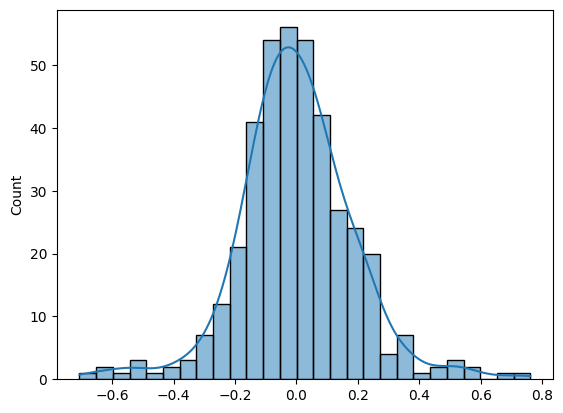

In [38]:
# Plot histogram of residuals
sns.histplot(residual, kde = True)

**Observations**: 
* We can see the error terms are normally distributed, hence the assumption of normality is satisfied. 

### 3. Linearity of Variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test this assumption, we'll plot the residuals and the fitted values and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

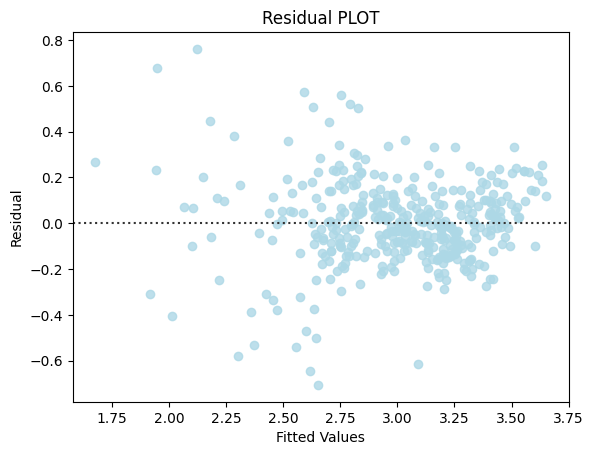

In [39]:
# Predicted values
fitted = ols_res_2.fittedvalues

sns.residplot(x = fitted, y = residual, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations**: 
* We can see that there is no pattern in the residuals vs fitted values.

### 4. No heteroscedasticity

#### **Test for Homoscedasticity**

* **Homoscedasticity -** If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* **Heteroscedasticity -** If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form an arrow shape or any other non symmetrical shape.

- We will use Goldfeld–Quandt test to check homoscedasticity.

    - Null hypothesis : Residuals are homoscedastic

    - Alternate hypothesis : Residuals are hetroscedastic

In [40]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [41]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, x_train1)

lzip(name, test)

[('F statistic', 1.907544482780675), ('p-value', 5.518418876007775e-06)]

**Observations**:
* The P-value is less than than 0.05, so we can reject the null hypothesis and accept the alternative hypothesis that the residuals are hetroscedastic. Hence, the last assumption of the linear regression is not satisfied. 

In [42]:
#extract coefficients from the linear regression
coef = ols_res_2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,3.009547
1,CRIM,-0.093423
2,NOX,-0.089975
3,RM,0.059590
4,DIS,-0.076493
5,PTRATIO,-0.085910
6,LSTAT,-0.183968


## Final Model Evaluation

### R Squared

The R-squared metric gives us an indication that how good/bad our model is from a baseline model. Here, our model can explain 80% of the variance in the 

In [43]:
print(ols_res_2.rsquared)

0.775519004623504


### Mean Squared Error

This metric measures the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value.

In [44]:
print(ols_res_2.mse_resid)

0.03523832833717672


### RMSE, MAPE, MAE

In [45]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(ols_res_2, x_train1, x_test1)  

    Data      RMSE       MAE      MAPE
0  Train  0.186035  0.136205  4.856051
1   Test  0.166568  0.129652  4.438033


**Observations**: 
* The RMSE of the training and test data is very similar at 0.185 and 0.166. 
* The MAE of the training and test data is very similar at 0.134 and 0.129
* The MAPE of the training and test data is very similar at 4.8 and 4.4. 

## Perform Cross Validation

In [52]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, x_train1, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, x_train1, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))
rmse = np.sqrt(-1 * cv_Scores12.mean())
print("RMSE" rmse)

SyntaxError: invalid syntax (2669483345.py, line 16)

# **Observations**: 
* The R-Squared on the cross-validation is 0.75 which is almost the same to the R-Squared on the training dataset value of 0.77. 
* The MSE is 0.037 which is also similar to the R-Squared on the training dataset of 0.035 on the training dataset. 

* Overall, the model is fitting very well. 

## Predictions on the Test Dataset

Now that our model is built and validated, we can now use this to predict the house prices in our test data as shown below. 

In [47]:

test_predictions = ols_res_2.predict(x_test1)

test_predictions_transformed = np.exp(test_predictions)

test_predictions_transformed * 1000

364    27564.776795
107    20039.446815
169    25840.019756
203    38388.536522
335    20920.613098
168    25986.059540
493    20545.909695
177    28733.251777
34     15473.055629
334    21786.295677
67     23100.675131
85     27373.064827
270    21173.019300
238    27942.382208
496    15486.407135
331    21448.836762
380     7231.094752
326    23890.318113
159    24231.546983
220    27391.242908
497    19234.497520
31     18437.766783
379    12872.212587
295    29247.801764
198    34370.294811
128    18326.222746
325    24862.410062
449    14679.732030
142    13160.074917
316    17836.818286
190    31353.296343
194    31629.699090
284    29419.640851
4      27489.355533
302    27470.390497
441    14012.441704
469    15806.963215
300    30241.980719
253    28788.922341
241    22926.600710
408    12761.341008
47     18424.957524
360    19300.848981
66     24398.720444
392    10765.861690
132    19934.211091
62     22982.763496
351    23139.624998
5      25838.272328
311    26195.333110


**Observations:** The above values are the predicted values of the test dataset homes in dollars, which appear to be reasonable based on the univariate analysis of MEDV.

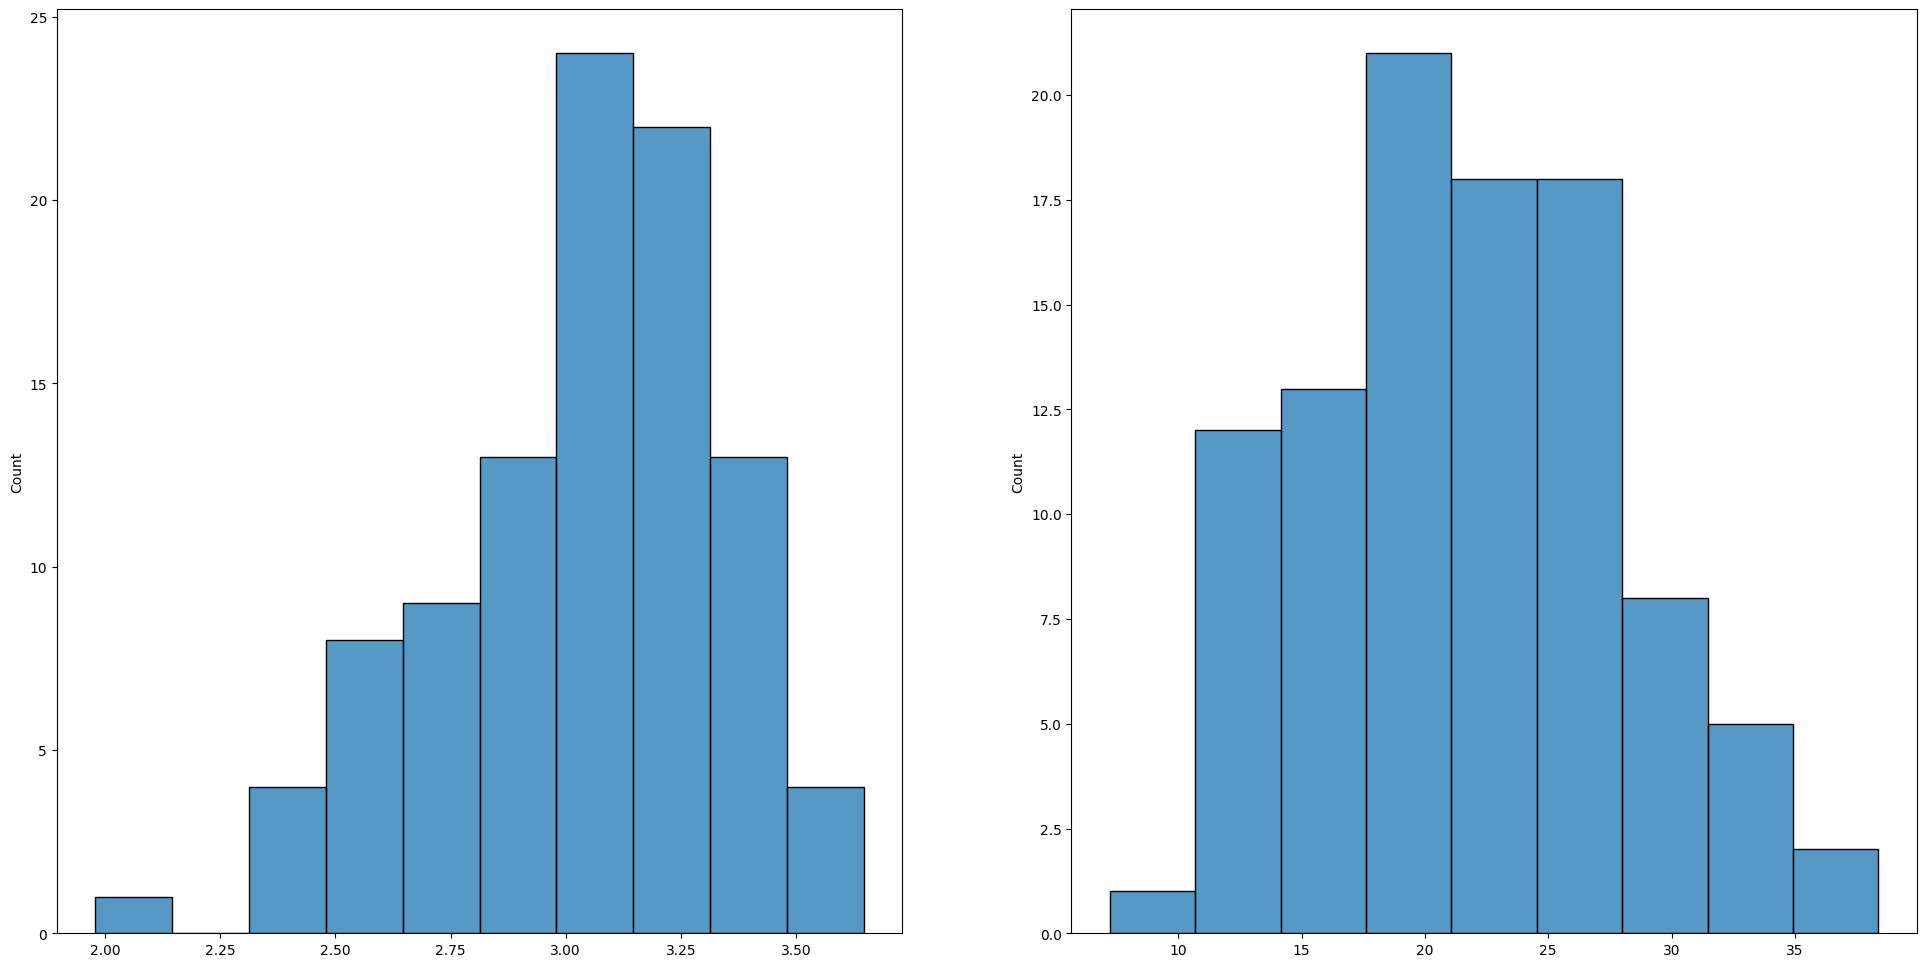

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (24, 12))

sns.histplot(test_predictions, ax = ax[0]);

sns.histplot(test_predictions_transformed, ax = ax[1]);

## Actionable Insights and Recommendations 

* We performed EDA, univariate and bivariate analysis on all the variables in the dataset.
* We then looked at outliers that may be skewing the data and removed them. For example, we found that the dataset an artificial price cap at 50,000 dollars.
* We started the model building process by looking at all the features, and removing the insignificant ones that did not have a correlation with house prices, like the age of the house, the access to radial highways, the property tax, and the proportion of industrial buildings in the town.
* We removed multicollinearity from the data by detecting variables with high variability inflation factor and removing them. 
* We checked for different assumptions of the linear regression. All assumptions except homoscedasticity were met, indicating there are limitations to the linear regression model without further transformation of the dependent variable.
* Finally, we evaluated the performance of the model on the training and test data, and saw that the model have good fit. 



Lastly, the model equation is the following: 

log ($MEDV$)$ $ = 3.009 + 0.018 * CHAS + 0.059 * RM - 0.09 * CRIM - 0.09 * NOX - 0.075 * DIS - 0.08 * PTRATIO - 0.183 * LSTAT. 

**Recommendations**:
* For home buyers, property investors, and housebuilders, there are a number of factors that are important to consider when buying, building, or investing in property. 
* It is clear that biggest factors that positively influence the house price are the number of rooms of the house. The more rooms in the house, the more valuable the house, which makes sense. Home builders should look to build large homes to increase their margins. 
* Building a home on the Charles River will also increase the price of a home. 
* It is clear that the biggest factors that negatively influence the house price are the percentage of lower socioeconomic class in the town, the crime rate, pollution, distance from employment ratios, and high ratios of teachers to students. This makes sense, since theses are all factors that would generally depress the living experience of a town and bring down the housing prices.
* For home buyers, we recommend checking air quality data, crime rates, the percentage of people in poverty in the town, and the ratio of teachers to students before buying a home. These social factors may depress the price of the home if they do not improve over time. 
